# Linear regression example
In this example, we are again using a dataset with [YouTube statistics from the top 5000 channels](https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade)

In [1]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('youtube.csv')
df = df.sort_values(by='subscribers', ascending=False) #sort the data set to see the biggest channels first

df.head(10)

name  uploads  subscribers        views
644          PewDiePie     3601     65995310  18684630003
275           T-Series    12661     61196302  47548839843
1724   Canal KondZilla      822     39409726  19291034467
3264      Dude Perfect      185     34489432   6095981611
3529    HolaSoyGerman.      137     34480357   3617584451
3621  JustinBieberVEVO      123     34284457  17806717170
3627        Ed Sheeran      122     33961184  14521211040
962    5-Minute Crafts     2085     33492951   8587520379
120                WWE    36756     32852346  26273668433
2596  whinderssonnunes      349     31332790   2574018722

Again, these big numbers are kind of hard to work with. Let's divide the subscribers and views by a million to get "millions of subscribers" and "billions of views" (a billion is a thousand million, or 10<sup>9</sup>).

In [8]:
df['subscribers_m'] = df['subscribers'] / 1000000
df['views_b'] = df['views'] / 1000000000

Let's see if we can find a relation between subscribers and views. Let's first plot the relation. We'll plot subscribers on the x-asis, because subscribers are more likely to be the cause of views, than vice versa. That is, subscribers is our _independent_ variable, views our _dependent variable_.

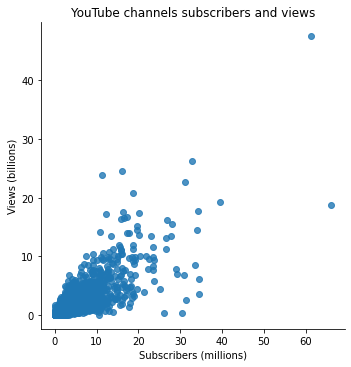

In [9]:
sns.lmplot(x='subscribers_m', y='views_b', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Subscribers (millions)')
plt.ylabel('Views (billions)')
plt.title('YouTube channels subscribers and views')
plt.show()

There are a few things to note here:
1. First, the data seem to fit a linear pattern: you can draw a straight line to fit the points
2. However, there is quite a bit of variation around this line. Some points will be above it, some below.
3. This variation seems to increase with the number of subscribers. That is, the more subscribers, the more uncertain the relation between subscribers and views.

Let's draw the line. In fact, Seaborn will automatically fit a line if you do not include the `fit_reg=False` argument:

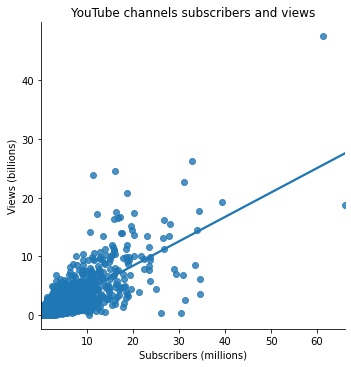

In [10]:
sns.lmplot(x='subscribers_m', y='views_b', data=df, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.title('YouTube channels subscribers and views')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Views (billions)')
plt.show()

Let's fit a linear model to determine the coefficients of the line. We'll do this with the machine learning package `sk-learn`.

In [6]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['subscribers_m']] 
y = df['views_b']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = 0.046 + 0.417X


Or, in a pretty Markdown formula (using $ to begin and end a formula):

$y= 0.046 + 0.417x$

Where _y_ is views in millions and _x_ is subscribers in millions.

Now, let's use our model to predict the values for all channels in our dataset:

In [7]:
df['views_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

name  uploads  subscribers        views  subscribers_m  \
644          PewDiePie     3601     65995310  18684630003      65.995310   
275           T-Series    12661     61196302  47548839843      61.196302   
1724   Canal KondZilla      822     39409726  19291034467      39.409726   
3264      Dude Perfect      185     34489432   6095981611      34.489432   
3529    HolaSoyGerman.      137     34480357   3617584451      34.480357   
3621  JustinBieberVEVO      123     34284457  17806717170      34.284457   
3627        Ed Sheeran      122     33961184  14521211040      33.961184   
962    5-Minute Crafts     2085     33492951   8587520379      33.492951   
120                WWE    36756     32852346  26273668433      32.852346   
2596  whinderssonnunes      349     31332790   2574018722      31.332790   

        views_b    views_p  
644   18.684630  27.551986  
275   47.548840  25.551806  
1724  19.291034  16.471371  
3264   6.095982  14.420639  
3529   3.617584  14.416857  
3621  17.806717  14.335208  
3627  14.521211  14.200471  
962    8.587520  14.005316  
120   26.273668  13.738318  
2596   2.574019  13.104981

Look at the last two columns. We see some reasonably correct predictions, and some that are completely off the mark. This will happen with every model. In the next Notebook (*evaluating_regression*) we will see how to evaluate model performance.